In [47]:
import pandas as pd
import numpy
import csv
import matplotlib.pyplot as plt

In [48]:
# WHO Mortality data
# Part 1 - https://www.who.int/healthinfo/statistics/Morticd10_part1.zip?ua=1
# Part 2 - https://www.who.int/healthinfo/statistics/Morticd10_part2.zip?ua=1

mortality_part1 = pd.read_csv('Morticd10_part1.csv', low_memory = False)
mortality_part2 = pd.read_csv('Morticd10_part2.csv', low_memory = False)
mortality = pd.concat([mortality_part1, mortality_part2], sort = False)

# WHO Country Codes
# https://www.who.int/healthinfo/statistics/country_codes.zip?ua=1

country_codes = pd.read_csv('country_codes.csv', low_memory = False)

# WHO Population data
# https://www.who.int/healthinfo/Pop.zip?ua=1

# population = pd.read_csv('pop.csv', low_memory = False)

In [49]:
#Filtered by the year 2012 only
mortality_2012 = mortality[mortality["Year"]==2012]

In [50]:
#Groupby Country and Cause and select top 3 causes of death for children <1 for each country
Deaths2_group_2012 = pd.DataFrame(mortality_2012.groupby(['Country','Cause'])['Deaths2'].sum())
Deaths2_non_null_2012 = Deaths2_group_2012[Deaths2_group_2012["Deaths2"]!=0].copy()
Deaths2_non_null_2012.sort_values(["Country","Deaths2"], ascending=False,inplace=True)
Deaths2_non_null_2012=Deaths2_non_null_2012.reset_index()
Result_2012 = Deaths2_non_null_2012.groupby(["Country"]).head(4)
Result_2012 = Result_2012.reset_index()

Result_2012["Infant Death %"] = 0

for i, row in Result_2012.iterrows():
   if row['Cause'] == "AAA":
       overall_deaths = row["Deaths2"]
       Result_2012.iloc[i, 4] = 1
   else:
       Result_2012.iloc[i, 4] = row["Deaths2"]/overall_deaths

Result_2012.head(9)

,index,Country,Cause,Deaths2,Infant Death %
0,0,5150,AAA,294.0,1.000000
1,1,5150,P072,61.0,0.207483
2,2,5150,R95,18.0,0.061224
3,3,5150,W759,17.0,0.057823
4,118,5070,AAA,320.0,1.000000
5,119,5070,P073,39.0,0.121875
6,120,5070,A099,22.0,0.068750
7,121,5070,P072,16.0,0.050000
8,233,5020,AAA,1031.0,1.000000


In [51]:
# Getting the Country names in it

mydict = {}
with open('country_codes.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter = ',')
    for row in reader:
        mydict[row[0]] = row[1]

Result_2012['Country_Name'] = Result_2012['Country'].astype(str).replace(mydict)

Result_2012.head()

,index,Country,Cause,Deaths2,Infant Death %,Country_Name
0,0,5150,AAA,294.0,1.000000,New Zealand
1,1,5150,P072,61.0,0.207483,New Zealand
2,2,5150,R95,18.0,0.061224,New Zealand
3,3,5150,W759,17.0,0.057823,New Zealand
4,118,5070,AAA,320.0,1.000000,Fiji


In [52]:
#Getting it down to one row per (Total infant deaths)

Result_2012_b = Result_2012[Result_2012["Cause"]=='AAA']
Result_2012_c = Result_2012_b[['index', 'Country', 'Cause', 'Deaths2', 'Infant Death %', 'Country_Name']]
Result_2012_c.head()

,index,Country,Cause,Deaths2,Infant Death %,Country_Name
0,0,5150,AAA,294.0,1.0,New Zealand
4,118,5070,AAA,320.0,1.0,Fiji
8,233,5020,AAA,1031.0,1.0,Australia
12,479,4335,AAA,6390.0,1.0,Uzbekistan
16,637,4330,AAA,217.0,1.0,"United Kingdom, Scotland"


In [53]:
Result_2012_b = Result_2012[Result_2012["Cause"]=='AAA']
Result_2012_c = Result_2012_b[['index', 'Country', 'Cause', 'Deaths2', 'Infant Death %', 'Country_Name']]
Result_2012_c.head()

,index,Country,Cause,Deaths2,Infant Death %,Country_Name
0,0,5150,AAA,294.0,1.0,New Zealand
4,118,5070,AAA,320.0,1.0,Fiji
8,233,5020,AAA,1031.0,1.0,Australia
12,479,4335,AAA,6390.0,1.0,Uzbekistan
16,637,4330,AAA,217.0,1.0,"United Kingdom, Scotland"


In [54]:
# Total deaths by country
Deaths3_group = pd.DataFrame(mortality_2012.groupby(['Country'])['Deaths1'].sum())
Deaths3_group.head(10)

,Deaths1
Country,
1060,5528
1125,1058466
1300,18206
1303,906
1310,95398
1360,8360
1365,480
1400,1921
1430,982200


In [55]:
#Getting it to have Both Deaths2 and Deaths1
#    WE MUST ADD AN ADDITIONAL COLUMN: Deaths2 divided by Deaths1

Deaths4 = Result_2012_c.merge(Deaths3_group, on=["Country"])
Deaths4.head()

,index,Country,Cause,Deaths2,Infant Death %,Country_Name,Deaths1
0,0,5150,AAA,294.0,1.0,New Zealand,60554
1,118,5070,AAA,320.0,1.0,Fiji,13532
2,233,5020,AAA,1031.0,1.0,Australia,294196
3,479,4335,AAA,6390.0,1.0,Uzbekistan,291976
4,637,4330,AAA,217.0,1.0,"United Kingdom, Scotland",109874


In [56]:
#Total number of deaths per cause code
Result3 = Result_2012.groupby(["Cause"]).sum()['Deaths2']

Result4 = pd.DataFrame(Result3).sort_values('Deaths2', ascending = False)

Result4.head()

,Deaths2
Cause,
AAA,293923.0
1000,28692.0
1092,15554.0
P220,14976.0
P369,10695.0


In [57]:
#Show Deaths2 and Deaths1
Deaths2_group = pd.DataFrame(mortality_2012.groupby(['Country','Cause'])[['Deaths2','Deaths1']].sum())
Deaths2_non_null = Deaths2_group[Deaths2_group["Deaths2"]!=0]
Deaths2_group.sort_values(["Country","Deaths2"], ascending=False,inplace=True)
Deaths2_group=Deaths2_group.reset_index()
Result = Deaths2_group.groupby(["Country"]).head(4)
Result.head()

,Country,Cause,Deaths2,Deaths1
0,5150,AAA,294.0,30277
1,5150,P072,61.0,61
2,5150,R95,18.0,18
3,5150,W759,17.0,17
1407,5070,AAA,320.0,6766


In [58]:
mydict = {}
with open('country_codes.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter = ',')
    for row in reader:
        mydict[row[0]] = row[1]

Result_2012['Country_Name'] = Result_2012['Country'].astype(str).replace(mydict)

Result_2012.head(20)

,index,Country,Cause,Deaths2,Infant Death %,Country_Name
0,0,5150,AAA,294.0,1.000000,New Zealand
1,1,5150,P072,61.0,0.207483,New Zealand
2,2,5150,R95,18.0,0.061224,New Zealand
3,3,5150,W759,17.0,0.057823,New Zealand
4,118,5070,AAA,320.0,1.000000,Fiji
5,119,5070,P073,39.0,0.121875,Fiji
6,120,5070,A099,22.0,0.068750,Fiji
7,121,5070,P072,16.0,0.050000,Fiji
8,233,5020,AAA,1031.0,1.000000,Australia
9,234,5020,R95,58.0,0.056256,Australia


In [59]:
#This gets us The country names and some of the cause names

mydict = {}
mydict2 = {"AAA":"Total"}

with open('country_codes.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter = ',')
    for row in reader:
        mydict[row[0]] = row[1]

with open('icd10_codes_2011_csv.csv', mode='r') as infile:
    reader2 = csv.reader(infile, delimiter = ',')
    for row in reader2:
        mydict2[row[0]] = row[1]
        
Result_2012['Cause_Name'] = Result_2012['Cause'].replace(mydict2)
Result_2012['Country_Name'] = Result_2012['Country'].astype(str).replace(mydict)

Result_2012.head(7)

,index,Country,Cause,Deaths2,Infant Death %,Country_Name,Cause_Name
0,0,5150,AAA,294.0,1.000000,New Zealand,Total
1,1,5150,P072,61.0,0.207483,New Zealand,Extreme Immaturity
2,2,5150,R95,18.0,0.061224,New Zealand,Sudden Infant Death Syndrome
3,3,5150,W759,17.0,0.057823,New Zealand,W759
4,118,5070,AAA,320.0,1.000000,Fiji,Total
5,119,5070,P073,39.0,0.121875,Fiji,Preterm Infant
6,120,5070,A099,22.0,0.068750,Fiji,Gastroenteritis and colitis of unspecified origin


In [60]:
gdp = pd.read_csv('GDP.csv')

gdp_2012 = gdp[['Country Name', '2012']].copy()

gdp_2012.rename({'2012' : 'GDP (per capita, in current USD)'},

                axis = 1,

                inplace = True)

gdp_2012['Quintile'] = pd.qcut(gdp_2012['GDP (per capita, in current USD)'], 5, ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


new_df = gdp_2012

excluded_words = ['dividend',
                  'world',
                  'small',
                  'IDA',
                  'IBRD',
                  'indebted',
                  'poor',
                  'conflict',
                  'developed',
                  'OECD',
                  'income']

for word in excluded_words:

    new_df = new_df[~new_df["Country Name"].str.contains(word)]

new_df.dropna(how='all')

new_df = gdp_2012

gdp_2012.head(30)

,Country Name,"GDP (per capita, in current USD)",Quintile
0,Aruba,24709.602260,Q4
1,Afghanistan,648.511070,Q1
2,Angola,5102.489969,Q3
3,Albania,4247.614342,Q2
4,Andorra,38391.080870,Q5
5,Arab World,7465.135230,Q3
6,United Arab Emirates,42086.689950,Q5
7,Argentina,12969.707120,Q4
8,Armenia,3684.804810,Q2
9,American Samoa,11660.329530,Q4


In [61]:
Result_2012_b = Result_2012[Result_2012["Cause"]=='AAA']
Result_2012_c = Result_2012_b[['index', 'Deaths2', 'Country_Name']]
Result_2012_c.head()

,index,Deaths2,Country_Name
0,0,294.0,New Zealand
4,118,320.0,Fiji
8,233,1031.0,Australia
12,479,6390.0,Uzbekistan
16,637,217.0,"United Kingdom, Scotland"


In [62]:
Causes_count_dict = {}

for ix, row in Result.iterrows():
    if row['Cause'] not in Causes_count_dict:
        Causes_count_dict[row['Cause']] = row['Deaths2']
    if row['Cause'] in Causes_count_dict:
        Causes_count_dict[row['Cause']] += row['Deaths2']
        
Causes_count2 = {"AAA": [12634]}
Result_2012 = Result.groupby(["Cause","Country"]).sum()
Result_2012

pd.DataFrame(Causes_count2)

#Groupby Country and Cause and select top 3 causes of death for children <1 for each country
Deaths2_group_2012 = pd.DataFrame(mortality_2012.groupby(['Country','Cause'])['Deaths2'].sum())
Deaths2_non_null_2012 = Deaths2_group_2012[Deaths2_group_2012["Deaths2"]!=0].copy()
Deaths2_non_null_2012.sort_values(["Country","Deaths2"], ascending=False,inplace=True)
Deaths2_non_null_2012=Deaths2_non_null_2012.reset_index()
Result_2012 = Deaths2_non_null_2012.groupby(["Country"]).head(4)
Result_2012 = Result_2012.reset_index()
Result_2012.head()

,index,Country,Cause,Deaths2
0,0,5150,AAA,294.0
1,1,5150,P072,61.0
2,2,5150,R95,18.0
3,3,5150,W759,17.0
4,118,5070,AAA,320.0


In [63]:
#Calculate percentage of each infant death cause code per total infant deaths per country
Result_2012["Infant Death %"] = 0

for i, row in Result_2012.iterrows():
   if row['Cause'] == "AAA":
       overall_deaths = row["Deaths2"]
       Result_2012.iloc[i, 4] = 1
   else:
       Result_2012.iloc[i, 4] = row["Deaths2"]/overall_deaths

Result_2012.head(20)

#Result_2012.to_excel("results.csv",index=False)

,index,Country,Cause,Deaths2,Infant Death %
0,0,5150,AAA,294.0,1.000000
1,1,5150,P072,61.0,0.207483
2,2,5150,R95,18.0,0.061224
3,3,5150,W759,17.0,0.057823
4,118,5070,AAA,320.0,1.000000
5,119,5070,P073,39.0,0.121875
6,120,5070,A099,22.0,0.068750
7,121,5070,P072,16.0,0.050000
8,233,5020,AAA,1031.0,1.000000
9,234,5020,R95,58.0,0.056256


In [64]:
#This gets us The country names and some of the cause names

mydict = {}
mydict2 = {"AAA":"Total"}

with open('country_codes.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter = ',')
    for row in reader:
        mydict[row[0]] = row[1]

with open('icd10_codes_2011_csv.csv', mode='r') as infile:
    reader2 = csv.reader(infile, delimiter = ',')
    for row in reader2:
        mydict2[row[0]] = row[1]
        
Result_2012['Cause_Name'] = Result_2012['Cause'].replace(mydict2)
Result_2012['Country_Name'] = Result_2012['Country'].astype(str).replace(mydict)

Result_2012.head(7)

,index,Country,Cause,Deaths2,Infant Death %,Cause_Name,Country_Name
0,0,5150,AAA,294.0,1.000000,Total,New Zealand
1,1,5150,P072,61.0,0.207483,Extreme Immaturity,New Zealand
2,2,5150,R95,18.0,0.061224,Sudden Infant Death Syndrome,New Zealand
3,3,5150,W759,17.0,0.057823,W759,New Zealand
4,118,5070,AAA,320.0,1.000000,Total,Fiji
5,119,5070,P073,39.0,0.121875,Preterm Infant,Fiji
6,120,5070,A099,22.0,0.068750,Gastroenteritis and colitis of unspecified origin,Fiji


In [65]:
#merging gdp data with Deaths4
Result_2012_merge = pd.merge(Result_2012, gdp_2012, left_on="Country_Name", right_on="Country Name", how='left')
Result_2012_merge.head(2)

,index,Country,Cause,Deaths2,Infant Death %,Cause_Name,Country_Name,Country Name,"GDP (per capita, in current USD)",Quintile
0,0,5150,AAA,294.0,1.000000,Total,New Zealand,New Zealand,39970.25624,Q5
1,1,5150,P072,61.0,0.207483,Extreme Immaturity,New Zealand,New Zealand,39970.25624,Q5


In [66]:
#Create an alphabetical list of countries in our dataset
country_list = Result_2012.Country_Name.unique()
country_list = country_list.tolist()
country_list = sorted(country_list)

#Create pie chart for a particular country to display top 3 causes of infant mortality
country = input(f"Which country would you like to see the top 3 causes of infant mortality? {country_list} ")

#Grab country quintile
quintile = gdp_2012.loc[gdp_2012["Country Name"] == country, "Quintile"].tolist()
print(str(quintile))

#Grab data frame of the data for selected country
selected_country_df = []
selected_country_df = Result_2012.loc[Result_2012["Country_Name"] == country]
selected_country_df

Which country would you like to see the top 3 causes of infant mortality? ['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Bermuda', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Georgia', 'Germany', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mayotte', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Occupied Palestinian Territory', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Qata

,index,Country,Cause,Deaths2,Infant Death %,Cause_Name,Country_Name
389,17377,2030,AAA,57.0,1.000000,Total,Bahamas
390,17378,2030,A419,7.0,0.122807,"Sepsis, unspecified",Bahamas
391,17379,2030,P269,6.0,0.105263,Unspecified pulmonary hemorrhage originating i...,Bahamas
392,17380,2030,P219,5.0,0.087719,Birth Asphyxia,Bahamas


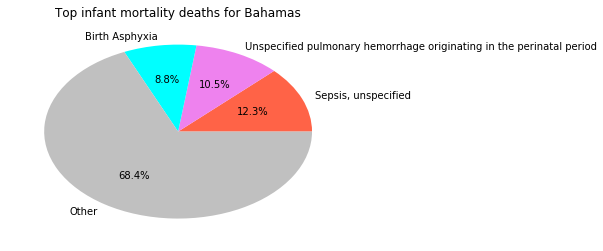

In [69]:
#Parse data for pie chart
selected_country_cause_labels = selected_country_df.Cause_Name.tolist()
selected_country_cause_labels
if selected_country_cause_labels[0] == "Total":
    selected_country_cause_labels.remove("Total")
    selected_country_cause_labels.append("Other")
    
    selected_country_perc = selected_country_df["Infant Death %"].tolist()
    selected_country_perc.remove(1)
    selected_country_perc.append(1-sum(selected_country_perc))
    
else:
    selected_country_perc = selected_country_df["Infant Death %"].tolist()

colors = ['tomato', 'violet', 'aqua', 'silver']
country_plot = plt.pie(selected_country_perc, labels=selected_country_cause_labels,autopct="%1.1f%%", colors = colors)
plt.title(f"Top infant mortality deaths for {country}")

plt.show()

In [70]:
mydict = {}
with open('country_codes.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter = ',')
    for row in reader:
        mydict[row[0]] = row[1]

mortality['Country Name'] = mortality['Country'].astype(str).replace(mydict)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Country_Name
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,Seychelles
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,Seychelles
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
